Semantic Analysis on selected song.<br>
For now the only libary use is textblob and NLTK for semantic purpose<br>
Disclaimer: This is very basic project, the data was not normalize and not other clean up process was done

In [1]:
!pip install spacytextblob
!pip install textblob
!pip install bs4
!pip install requests
!pip install matplotlib
!pip install pandas

In [2]:
from textblob import TextBlob
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import requests
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [3]:
def scrape_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, "html.parser")
    lyrics = html.find("pre", class_="lyric-body").get_text()
    print(url)
    return lyrics.replace("\n"," ")


links = ['https://www.lyrics.com/lyric/36863481/Justin+Bieber/Yummy',
     'https://www.lyrics.com/lyric/35362456/Ed+Sheeran/Castle+on+the+Hill',
     'https://www.lyrics.com/lyric/35342586/Taylor+Swift/22',
     'https://www.lyrics.com/lyric/36147543/Kygo/Happy+Now',
     'https://www.lyrics.com/sublyric/58125/Lauv/Superhero',
     'https://www.lyrics.com/lyric/30514737/Fix+You',
     'https://www.lyrics.com/lyric/32981724/One+Direction/Perfect',
     'https://www.lyrics.com/lyric/36489666/Bahari/Crashing',
     'https://www.lyrics.com/lyric/33787626/ROZES/Matches',
     'https://www.lyrics.com/lyric/36341880/Maroon+5/She+Will+Be+Loved',
     'https://www.lyrics.com/lyric/25306933/Queen/Dont+Stop+Me+Now',
     'https://www.lyrics.com/lyric/31781320/Eric+Clapton/Tears+In+Heaven']


lyrics = [scrape_lyrics(link) for link in links]

artists = ['JustinBieber', 'EdSheeran', 'TaylorSwift', 'Kygo', 'Lauv', 'Coldplay', 'OneDirection','Bahari','Rozes','Maroon5', 'Queen', 'EricClapton']

#fun fact: queen dont stop me now is apparently the happiest song, and eric clapton is supposedly a sad song
# https://www.indy100.com/article/dont-stop-me-now-is-the-happiest-song-in-the-world-according-to-a-neuroscientist-7318321
#but there's more to the what affects the sentiment of the song, not just the lyrics, e.g. tempo

https://www.lyrics.com/lyric/36863481/Justin+Bieber/Yummy
https://www.lyrics.com/lyric/35362456/Ed+Sheeran/Castle+on+the+Hill
https://www.lyrics.com/lyric/35342586/Taylor+Swift/22
https://www.lyrics.com/lyric/36147543/Kygo/Happy+Now
https://www.lyrics.com/sublyric/58125/Lauv/Superhero
https://www.lyrics.com/lyric/30514737/Fix+You
https://www.lyrics.com/lyric/32981724/One+Direction/Perfect
https://www.lyrics.com/lyric/36489666/Bahari/Crashing
https://www.lyrics.com/lyric/33787626/ROZES/Matches
https://www.lyrics.com/lyric/36341880/Maroon+5/She+Will+Be+Loved
https://www.lyrics.com/lyric/25306933/Queen/Dont+Stop+Me+Now
https://www.lyrics.com/lyric/31781320/Eric+Clapton/Tears+In+Heaven


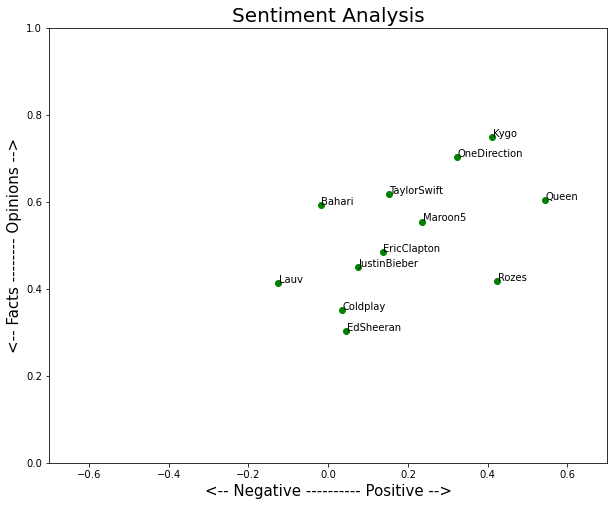

In [4]:
#Using TextBlob

df = pd.DataFrame({'Lyrics':lyrics}, index=artists)
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Lyrics'].apply(pol)
df['subjectivity'] = df['Lyrics'].apply(sub)

plt.rcParams['figure.figsize'] = [10, 8]

for artist in df.index:
    x = df.polarity.loc[artist]
    y = df.subjectivity.loc[artist]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, artist, fontsize=10)
    plt.xlim(-.7, .7) 
    plt.ylim(0,1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ---------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\izhaf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


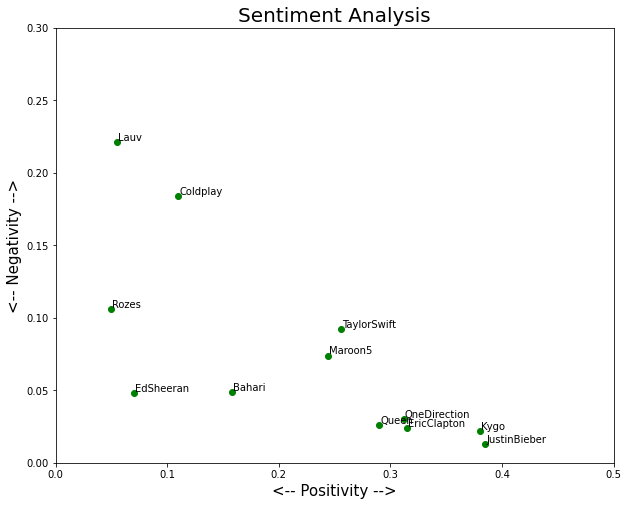

In [5]:
#Using NLTK

nltk.download('vader_lexicon')
sentiment = SentimentIntensityAnalyzer() 
sentiment.polarity_scores("Chicken suck")


df = pd.DataFrame({'Lyrics':lyrics}, index=artists)
pol = lambda x: sentiment.polarity_scores(x)['pos']
sub = lambda x: sentiment.polarity_scores(x)['neg']
df['polarity'] = df['Lyrics'].apply(pol)
df['subjectivity'] = df['Lyrics'].apply(sub)

plt.rcParams['figure.figsize'] = [10, 8]

for artist in df.index:
    x = df.polarity.loc[artist]
    y = df.subjectivity.loc[artist]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, artist, fontsize=10)
    plt.xlim(0,0.5) 
    plt.ylim(0,0.3) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Positivity -->', fontsize=15)
plt.ylabel('<-- Negativity -->', fontsize=15)

plt.show()